<a href="https://colab.research.google.com/github/Abhishek4848/Homicide_Data_Analysis/blob/main/homicide_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing packages

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

##Importing the Dataset

In [89]:
url = 'https://raw.githubusercontent.com/Abhishek4848/Homicide_Data_Analysis/main/BPD_Part_1_Victim_Based_Crime_Data.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [90]:
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Unnamed: 9,Total Incidents
0,6/18/2016,0:33:00,4E,2700 CHESLEY AVE,I,HANDS,424.0,NORTHEASTERN,North Harford Road,NaN,1
1,6/18/2016,0:39:00,4B,2700 FAIT AVE,O,KNIFE,232.0,SOUTHEASTERN,Canton,NaN,1
2,6/18/2016,15,9S,2400 CYLBURN AV,Outside,FIREARM,532.0,NORTHERN,Levindale,NaN,1
3,6/18/2016,1:53:00,3AF,2300 ORLEANS ST,O,FIREARM,221.0,SOUTHEASTERN,McElderry Park,NaN,1
4,6/18/2016,2:05:00,6C,800 N WOLFE ST,I,NaN,321.0,EASTERN,Middle East,NaN,1


In [91]:
df.tail()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Unnamed: 9,Total Incidents
264491,1/1/2011,22:15:00,4D,6800 MCCLEAN BD,I,HANDS,423.0,NORTHEASTERN,Hamilton Hills,NaN,1
264492,1/1/2011,22:30:00,6J,3000 ODONNELL ST,I,NaN,232.0,SOUTHEASTERN,Canton,NaN,1
264493,1/1/2011,23:00:00,7A,2500 ARUNAH AV,O,NaN,721.0,WESTERN,Evergreen Lawn,NaN,1
264494,1/1/2011,23:25:00,4E,100 N MONROE ST,I,HANDS,714.0,WESTERN,Penrose/Fayette Street Outreach,NaN,1
264495,1/1/2011,23:38:00,4D,800 N FREMONT AV,I,HANDS,123.0,WESTERN,Upton,NaN,1


In [92]:
df.shape

(264496, 11)

In [93]:
df.describe()

,Post,Unnamed: 9,Total Incidents
count,264286.000000,0.0,264496.0
mean,503.824493,NaN,1.0
std,260.825261,NaN,0.0
min,2.000000,NaN,1.0
25%,242.000000,NaN,1.0
50%,445.000000,NaN,1.0
75%,723.000000,NaN,1.0
max,945.000000,NaN,1.0


In [94]:
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Unnamed: 9,Total Incidents
0,6/18/2016,0:33:00,4E,2700 CHESLEY AVE,I,HANDS,424.0,NORTHEASTERN,North Harford Road,NaN,1
1,6/18/2016,0:39:00,4B,2700 FAIT AVE,O,KNIFE,232.0,SOUTHEASTERN,Canton,NaN,1
2,6/18/2016,15,9S,2400 CYLBURN AV,Outside,FIREARM,532.0,NORTHERN,Levindale,NaN,1
3,6/18/2016,1:53:00,3AF,2300 ORLEANS ST,O,FIREARM,221.0,SOUTHEASTERN,McElderry Park,NaN,1
4,6/18/2016,2:05:00,6C,800 N WOLFE ST,I,NaN,321.0,EASTERN,Middle East,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
264491,1/1/2011,22:15:00,4D,6800 MCCLEAN BD,I,HANDS,423.0,NORTHEASTERN,Hamilton Hills,NaN,1
264492,1/1/2011,22:30:00,6J,3000 ODONNELL ST,I,NaN,232.0,SOUTHEASTERN,Canton,NaN,1
264493,1/1/2011,23:00:00,7A,2500 ARUNAH AV,O,NaN,721.0,WESTERN,Evergreen Lawn,NaN,1
264494,1/1/2011,23:25:00,4E,100 N MONROE ST,I,HANDS,714.0,WESTERN,Penrose/Fayette Street Outreach,NaN,1


###Counting Unique data in various fields

In [95]:
df.nunique()

CrimeDate           1996
CrimeTime           4082
CrimeCode             81
Location           24919
Description            4
Weapon                 4
Post                 175
District               9
Neighborhood         278
Unnamed: 9             0
Total Incidents        1
dtype: int64

###No. of NULL/Na values in each field

In [96]:
df.isna().sum()

CrimeDate               0
CrimeTime               0
CrimeCode               0
Location             1804
Description          4051
Weapon             174663
Post                  210
District               61
Neighborhood         1873
Unnamed: 9         264496
Total Incidents         0
dtype: int64

####No. of crimes comitted with different weapons

In [97]:
df['Weapon'].value_counts()

HANDS      48252
FIREARM    19046
OTHER      13333
KNIFE       9202
Name: Weapon, dtype: int64

Text(0, 0.5, 'Number of kills')

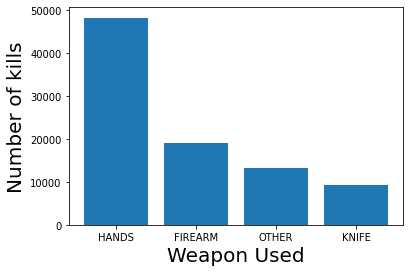

In [98]:
weapons = df['Weapon'].value_counts()
plt.bar(list(weapons.index),df['Weapon'].value_counts().tolist())
plt.xlabel("Weapon Used",fontsize=20)
plt.ylabel("Number of kills",fontsize=20)

###Correlation matrix to find relationship between various parameters in the dataset

In [99]:
corelation = df.corr()
corelation

,Post,Unnamed: 9,Total Incidents
Post,1.0,NaN,NaN
Unnamed: 9,NaN,NaN,NaN
Total Incidents,NaN,NaN,NaN


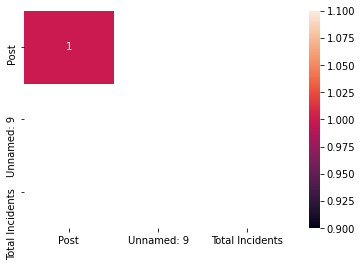

In [100]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

###Top 5 districts with highest no. of homicides

Text(0, 0.5, 'Number of Crime')

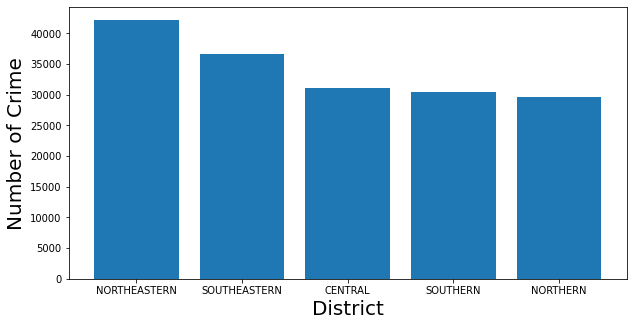

In [101]:
district = df['District'].value_counts()
plt.figure(figsize = (10,5))
plt.bar(list(district[0:5].index),df['District'].value_counts()[0:5].tolist())
plt.xlabel("District",fontsize=20)
plt.ylabel("Number of Crime",fontsize=20)

In [102]:
df['CrimeDate'].value_counts()

4/27/2015     418
6/5/2016      249
10/14/2011    199
7/30/2011     193
12/20/2013    192
             ... 
3/3/2014       59
3/5/2015       54
2/13/2014      46
1/24/2016      45
1/23/2016      31
Name: CrimeDate, Length: 1996, dtype: int64

In [138]:
_2011=[]
_2012=[]
_2013=[]
_2014=[]
_2015=[]
_2016=[]
df["CrimeDate"] = pd.to_datetime(df["CrimeDate"])
for i in (df['CrimeDate']):
  year= i.year
  if (year == 2011):
    _2011.append(i)
  if (year == 2012):
    _2012.append(i)
  if (year == 2013):
    _2013.append(i)
  if (year == 2014):
    _2014.append(i)
  if (year == 2015):
    _2015.append(i)
  if (year == 2016):
    _2016.append(i)

In [139]:
data =[['2011',len(_2011)],['2012',len(_2012)],['2013',len(_2013)],['2014',len(_2014)],['2015',len(_2015)],['2016',len(_2016)]]
crimeRate = pd.DataFrame(data)
crimeRate.columns = ['Year','Frequency']
crimeRate

,Year,Frequency
0,2011,50651
1,2012,49561
2,2013,49542
3,2014,45958
4,2015,48711
5,2016,20073


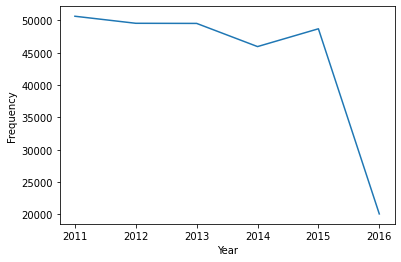

In [142]:
sns.lineplot(data=crimeRate, x="Year", y = "Frequency")

Text(0, 0.5, 'Number of Crimes')

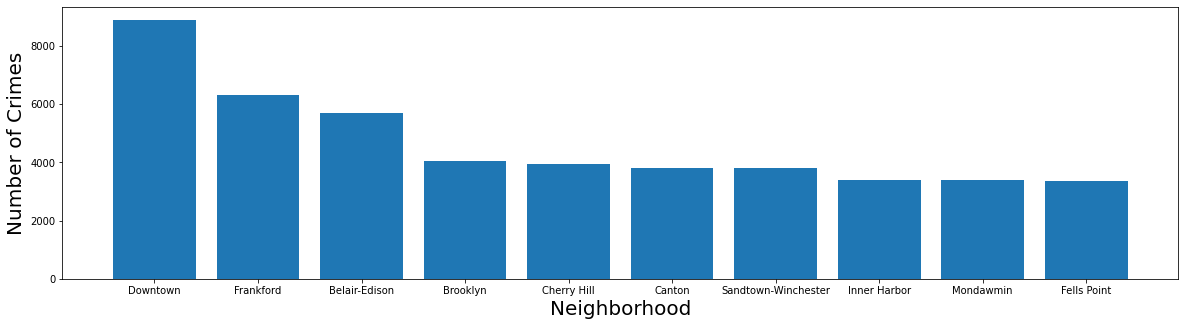

In [140]:
neigh = df['Neighborhood'].value_counts()
plt.figure(figsize = (20,5))
plt.bar(list(neigh[0:10].index),df['Neighborhood'].value_counts()[0:10].tolist())
plt.xlabel("Neighborhood",fontsize=20)
plt.ylabel("Number of Crimes",fontsize=20)